In [1]:
import pandas as pd

# Correct CSV reading with semicolon separator
path = "cordis-HORIZON/project.csv"
df = pd.read_csv(path, sep=";", quotechar='"', low_memory=False, encoding='utf-8', on_bad_lines='skip')

# Show columns
print(df.columns)
df.head()


Index(['id', 'acronym', 'status', 'title', 'startDate', 'endDate', 'totalCost',
       'ecMaxContribution', 'legalBasis', 'topics', 'ecSignatureDate',
       'frameworkProgramme', 'masterCall', 'subCall', 'fundingScheme',
       'nature', 'objective', 'contentUpdateDate', 'rcn', 'grantDoi'],
      dtype='object')


,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,ecSignatureDate,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi
0,101167187,U-AGREE,SIGNED,U-space Air and Ground Risk modEls Enhancement,2024-09-01,2027-02-28,"1018053,75","953553,75",HORIZON.2.5,HORIZON-SESAR-2023-DES-ER2-WA1-4,2024-06-26,HORIZON,HORIZON-SESAR-2023-DES-ER-02,HORIZON-SESAR-2023-DES-ER-02,HORIZON-JU-RIA,NaN,U-AGREE aims to develop an integrated risk mod...,2024-07-08 12:33:00,264662,10.3030/101167187
1,101114648,Engage 2,SIGNED,The SESAR 3 Knowledge Transfer Network,2023-06-01,2027-05-31,3801645,"3346287,5",HORIZON.2.5,HORIZON-SESAR-2022-DES-ER-01-WA3-1,2023-05-17,HORIZON,HORIZON-SESAR-2022-DES-ER-01,HORIZON-SESAR-2022-DES-ER-01,HORIZON-JU-CSA,NaN,Based on the experience of the previous Engage...,2023-07-25 18:40:59,254945,10.3030/101114648
2,101071734,Simularge,CLOSED,Physics-Informed AI platform for modeling of i...,2022-06-01,2022-11-30,0,75000,HORIZON.3.2,HORIZON-EIE-2021-SCALEUP-01-03,2022-05-16,HORIZON,HORIZON-EIE-2021-SCALEUP-01,HORIZON-EIE-2021-SCALEUP-01,HORIZON-CSA,NaN,Simularge aims to reduce the manufacturing was...,2022-09-04 02:54:44,239586,10.3030/101071734
3,101114316,GreenVisuals,CLOSED,Making Green Audiovisuals sustainable,2023-06-01,2023-11-30,0,75000,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02-02,2023-05-26,HORIZON,HORIZON-EIE-2022-SCALEUP-02,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,NaN,Audiovisuals create impactful communication. V...,2023-06-28 17:08:17,251293,10.3030/101114316
4,101114020,Seedchrony,CLOSED,Detecting the right moment to do embryo transf...,2023-06-01,2024-02-29,0,75000,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02-02,2023-05-31,HORIZON,HORIZON-EIE-2022-SCALEUP-02,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,NaN,In-vitro Fertilization (IVF) is a well-known f...,2023-06-28 17:03:12,251209,10.3030/101114020


In [2]:
# Normalize text columns
df['title'] = df['title'].fillna('').str.lower()
df['objective'] = df['objective'].fillna('').str.lower()

# Define keywords
keywords = ['quantum', 'qubit', 'quantum computing', 'entanglement', 'quantisation']

# Create a mask
mask = df['title'].str.contains('|'.join(keywords)) | df['objective'].str.contains('|'.join(keywords))

# Filter
quantum_df = df[mask].copy()

print(f"✅ Found {len(quantum_df)} quantum-related projects.")
quantum_df.to_csv("quantum_projects_filtered.csv", index=False)


✅ Found 1032 quantum-related projects.


In [3]:
# Convert start date to datetime
quantum_df['startDate'] = pd.to_datetime(quantum_df['startDate'], errors='coerce')

# Extract year
quantum_df['year'] = quantum_df['startDate'].dt.year

# Clean and convert EU contribution to numeric
quantum_df['ecMaxContribution'] = (
    quantum_df['ecMaxContribution']
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.replace(" ", "", regex=False)
    .astype(float)
)


# Total EU contribution per year
yearly_funding = quantum_df.groupby('year')['ecMaxContribution'].sum()

print(yearly_funding)


year
2022    1.020996e+10
2023    2.226604e+10
2024    1.383218e+10
2025    6.879798e+09
2026    7.565261e+08
Name: ecMaxContribution, dtype: float64


In [4]:
print(quantum_df.columns.tolist())


['id', 'acronym', 'status', 'title', 'startDate', 'endDate', 'totalCost', 'ecMaxContribution', 'legalBasis', 'topics', 'ecSignatureDate', 'frameworkProgramme', 'masterCall', 'subCall', 'fundingScheme', 'nature', 'objective', 'contentUpdateDate', 'rcn', 'grantDoi', 'year']


In [5]:
# Funding by year
yearly_funding = quantum_df.groupby('year')['ecMaxContribution'].sum()
print(yearly_funding)

# Funding by country
country_funding = quantum_df.groupby('coordinatorCountry')['ecMaxContribution'].sum().sort_values(ascending=False)
print(country_funding)


year
2022    1.020996e+10
2023    2.226604e+10
2024    1.383218e+10
2025    6.879798e+09
2026    7.565261e+08
Name: ecMaxContribution, dtype: float64


KeyError: 'coordinatorCountry'

In [6]:
# Load organization file
orgs = pd.read_csv("cordis-HORIZON/organization.csv", sep=";", quotechar='"', low_memory=False)

# Check available columns
print(orgs.columns)

Index(['projectID', 'projectAcronym', 'organisationID', 'vatNumber', 'name',
       'shortName', 'SME', 'activityType', 'street', 'postCode', 'city',
       'country', 'nutsCode', 'geolocation', 'organizationURL', 'contactForm',
       'contentUpdateDate', 'rcn', 'order', 'role', 'ecContribution',
       'netEcContribution', 'totalCost', 'endOfParticipation', 'active'],
      dtype='object')


In [7]:
# 1. Filter only coordinator orgs
coordinators = orgs[orgs['role'].str.lower() == 'coordinator'][['projectID', 'country']]

# 2. Merge with quantum_df
merged_df = quantum_df.merge(coordinators, left_on='id', right_on='projectID', how='left')

# Step 1: Remove commas and convert to float
merged_df['ecMaxContribution'] = (
    merged_df['ecMaxContribution']
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.replace(" ", "", regex=False)
    .astype(float)
)

# Step 2: Group by country and sum
country_funding = (
    merged_df.groupby('country')['ecMaxContribution']
    .sum()
    .sort_values(ascending=False)
)


# Ensure all funding values are floats
country_funding = country_funding.astype(float)

# Step 3: Pretty print
for country, amount in country_funding.items():
    print(f"{country:15} → {amount:,.0f} €")



DE              → 11,625,604,068 €
FR              → 11,053,326,634 €
AT              → 5,346,031,679 €
IT              → 5,254,582,024 €
NL              → 4,016,871,543 €
ES              → 3,411,002,460 €
BE              → 2,070,593,701 €
EL              → 1,869,939,546 €
FI              → 1,660,752,174 €
NO              → 1,222,754,803 €
DK              → 1,194,861,553 €
IE              → 884,574,416 €
SE              → 883,347,738 €
PT              → 801,329,721 €
PL              → 616,945,588 €
UK              → 453,302,521 €
IL              → 356,705,360 €
CZ              → 343,650,708 €
TR              → 253,571,986 €
CH              → 227,298,935 €
SI              → 213,246,000 €
LT              → 48,495,247 €
CY              → 44,838,335 €
HU              → 40,715,598 €
HR              → 20,416,968 €
SK              → 18,053,452 €
RS              → 5,058,699 €
LU              → 3,226,720 €
LV              → 1,904,800 €
EE              → 1,499,954 €


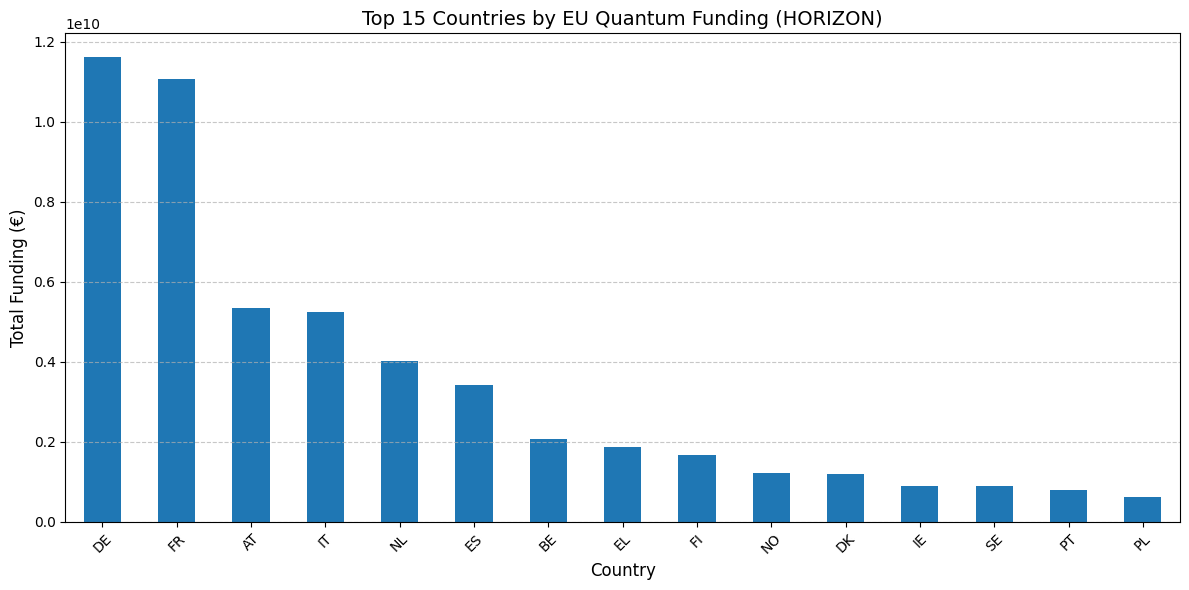

In [8]:
import matplotlib.pyplot as plt

# Sort and select top N countries
top_n = 15
top_countries = country_funding.sort_values(ascending=False).head(top_n)

# Plot
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title(f"Top {top_n} Countries by EU Quantum Funding (HORIZON)", fontsize=14)
plt.ylabel("Total Funding (€)", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Original rows: 1032
After removing duplicates: 1032


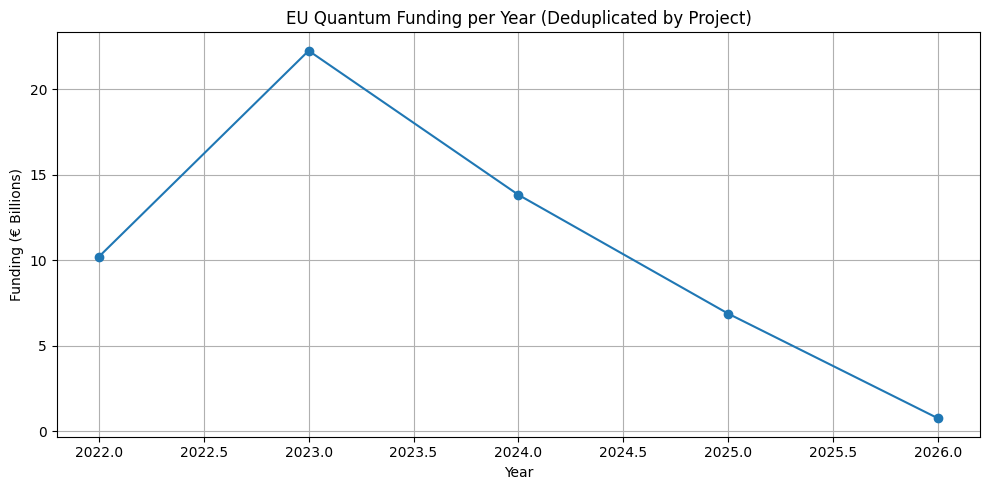

In [9]:
# Drop duplicates by project ID (keeping the first occurrence)
unique_projects = merged_df.drop_duplicates(subset='projectID')

# Optional: check how many rows you removed
print(f"Original rows: {len(merged_df)}")
print(f"After removing duplicates: {len(unique_projects)}")

# If you want to group by year and sum funding:
funding_per_year = unique_projects.groupby('year')['ecMaxContribution'].sum().reset_index()

# Plot (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(funding_per_year['year'], funding_per_year['ecMaxContribution'] / 1e9, marker='o')
plt.title('EU Quantum Funding per Year (Deduplicated by Project)')
plt.ylabel('Funding (€ Billions)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
dupes = merged_df[merged_df.duplicated(subset='projectID', keep=False)]
print(f"Total duplicates by project ID: {len(dupes)}")
display(dupes.sort_values('projectID'))


Total duplicates by project ID: 0


,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,...,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi,year,projectID,country


In [11]:
# Preview the merged results
merged_df[['id', 'acronym', 'title', 'country']].head(10)


,id,acronym,title,country
0,101192566,GRAVITEQA,"gravitational storage, quantum computing, and ...",EL
1,101119547,PQ-REACT,post quantum cryptography framework for energy...,EL
2,101119602,COBALT,certification for cybersecurity in eu ict usin...,EL
3,101194278,GN5-2,gn5-2,NL
4,101073795,POLIIICE,"powerful lawful interception, investigation, a...",DE
5,101137057,QUANTUM,"quality, utility and maturity measured; develo...",ES
6,101132327,CIDAPE,"climate, inequality, and democratic action: th...",AT
7,101177706,COLUMN,colonial legacies of universities: materialiti...,NL
8,101130174,ELBEX,an electron beamline at the european-xfel,DE
9,101216535,DeepTechSeeds,fostering talent ecosystems for early-stage re...,EL


In [12]:
# Extract year from startDate
unique_projects['startDate'] = pd.to_datetime(unique_projects['startDate'], errors='coerce')
unique_projects['year'] = unique_projects['startDate'].dt.year


In [13]:
# Group funding by year and country
pivot = (
    unique_projects.groupby(['year', 'country'])['ecMaxContribution']
    .sum()
    .unstack(fill_value=0)
)


In [14]:
pivot

country,AT,BE,CH,CY,CZ,DE,DK,EE,EL,ES,...,NL,NO,PL,PT,RS,SE,SI,SK,TR,UK
year,,,,,,,,,,,,,,,,,,,,,
2022,2.194566e+08,8.250505e+07,3567000.0,0.0,1975955.0,2.280059e+09,623827736.0,0.0,4.996729e+08,5.798100e+08,...,1.482937e+09,24137870.0,2999125.0,3192165.0,1060605.0,367291196.0,17139936.0,0.0,2000000.0,0.0
2023,3.447093e+09,4.216372e+07,105394560.0,44838335.0,82633864.0,5.626592e+09,69700258.0,0.0,1.089798e+09,1.190004e+09,...,1.067760e+09,845063789.0,201634123.0,249123087.0,1498239.0,332264126.0,161829311.0,1547500.0,1574625.0,0.0
2024,8.174507e+08,1.419385e+09,0.0,0.0,198297441.0,2.883288e+09,38445089.0,0.0,2.499719e+08,1.246634e+09,...,8.627900e+08,26671073.0,339227968.0,506990456.0,2499855.0,158212325.0,6366878.0,16505952.0,0.0,1499560.0
2025,8.175786e+08,5.263241e+08,89125487.0,0.0,20775816.0,7.310082e+08,413377814.0,1499954.0,3.049631e+07,3.556394e+08,...,5.800928e+08,326882071.0,73084372.0,22889701.0,0.0,24855231.0,27909875.0,0.0,249997361.0,342911793.0
2026,4.445294e+07,2.162400e+05,29211888.0,0.0,39967632.0,1.046556e+08,49510656.0,0.0,0.000000e+00,3.891562e+07,...,2.329162e+07,0.0,0.0,19134312.0,0.0,724860.0,0.0,0.0,0.0,108891168.0


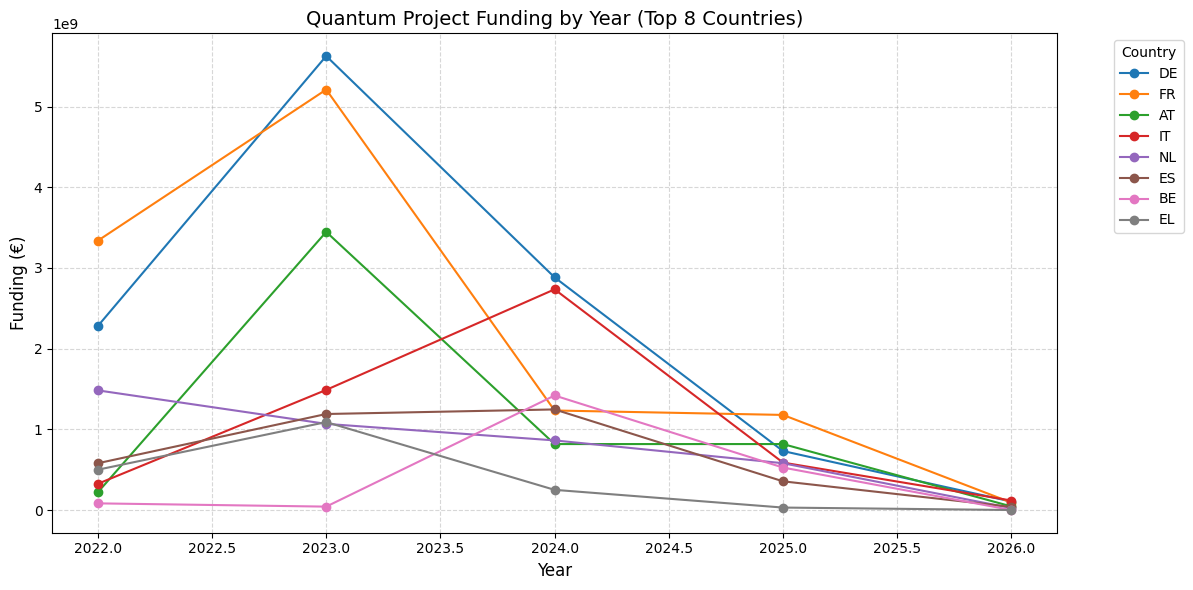

In [15]:
import matplotlib.pyplot as plt

# Step 1: Select top N countries overall
top_n = 8
top_countries = pivot.sum().sort_values(ascending=False).head(top_n).index
pivot_top = pivot[top_countries]

# Step 2: Plot
plt.figure(figsize=(12, 6))

for country in pivot_top.columns:
    plt.plot(pivot_top.index, pivot_top[country], marker='o', label=country)

plt.title(f"Quantum Project Funding by Year (Top {top_n} Countries)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Funding (€)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


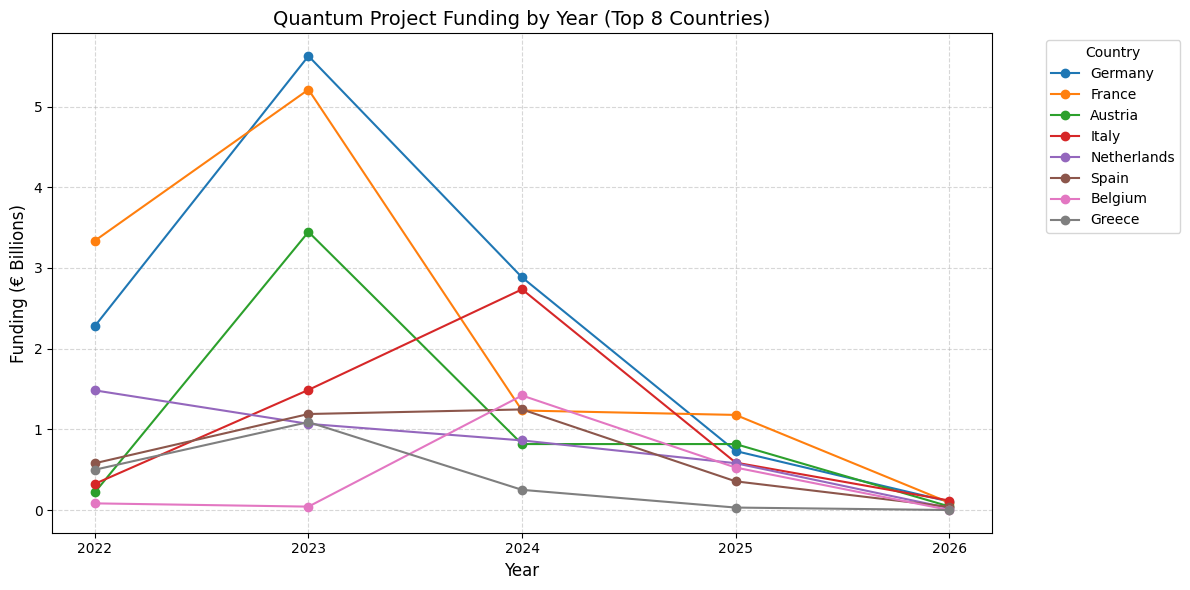

In [16]:
import matplotlib.pyplot as plt

# 1. Fix year type
pivot.index = pivot.index.astype(int)

# 2. Rename country codes (ISO alpha-2 to country names)
country_names = {
    'DE': 'Germany', 'FR': 'France', 'IT': 'Italy', 'NL': 'Netherlands',
    'AT': 'Austria', 'ES': 'Spain', 'BE': 'Belgium', 'EL': 'Greece'
}

pivot_renamed = pivot.rename(columns=country_names)

# 3. Select top N countries (again, based on new labels)
top_n = 8
top_countries = pivot_renamed.sum().sort_values(ascending=False).head(top_n).index
pivot_top = pivot_renamed[top_countries]

# 4. Convert € to billions for readability
pivot_top_billion = pivot_top / 1e9

# 5. Plot
plt.figure(figsize=(12, 6))
for country in pivot_top_billion.columns:
    plt.plot(pivot_top_billion.index, pivot_top_billion[country], marker='o', label=country)

plt.title(f"Quantum Project Funding by Year (Top {top_n} Countries)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Funding (€ Billions)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(pivot_top_billion.index)  # force only full years
plt.tight_layout()
plt.show()


(35105, 20)
Index(['id', 'acronym', 'status', 'title', 'startDate', 'endDate', 'totalCost',
       'ecMaxContribution', 'legalBasis', 'topics', 'ecSignatureDate',
       'frameworkProgramme', 'masterCall', 'subCall', 'fundingScheme',
       'nature', 'objective', 'contentUpdateDate', 'rcn', 'grantDoi'],
      dtype='object')


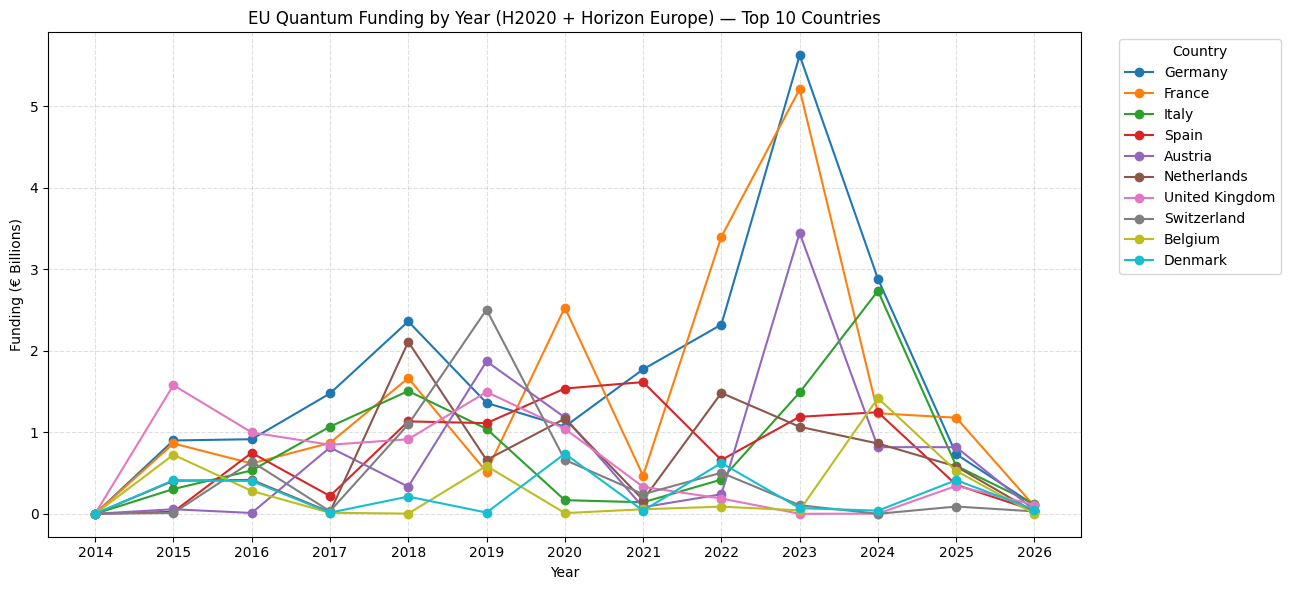

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

h2020_projects = pd.read_csv(
    "cordis-h2020/project.csv",
    sep=";",
    quotechar='"',
    on_bad_lines='skip',  # <- skip problematic lines
    low_memory=False
)

h2020_orgs = pd.read_csv(
    "cordis-h2020/organization.csv",
    sep=";",
    quotechar='"',
    on_bad_lines='skip',  # <- same here
    low_memory=False
)

print(h2020_projects.shape)
print(h2020_projects.columns)


# keyword filter (same list you used before)
kw = r"quantum|qubit|entanglement|quantum computing|quantisation"
h2020_q = h2020_projects[
    h2020_projects["title"].str.contains(kw, case=False, na=False)
    | h2020_projects["objective"].str.contains(kw, case=False, na=False)
].copy()

# coordinator country → merge
coordinators = h2020_orgs[h2020_orgs["role"].str.lower() == "coordinator"][["projectID", "country"]]
h2020_q = h2020_q.merge(coordinators, left_on="id", right_on="projectID", how="left")

# clean amount, add year
h2020_q["ecMaxContribution"] = (
    h2020_q["ecMaxContribution"].astype(str).str.replace(",", "", regex=False).astype(float)
)
h2020_q["year"] = pd.to_datetime(h2020_q["startDate"], errors="coerce").dt.year

##### 2. ----------  MERGE WITH  HORIZON EUROPE  ----------
all_q = pd.concat([merged_df, h2020_q], ignore_index=True)   # merged_df = your Horizon Europe quantum df

##### 3. ----------  BUILD PIVOT & RENAME CODES ----------
pivot_all = (
    all_q.groupby(["year", "country"])["ecMaxContribution"]
    .sum()
    .unstack(fill_value=0)
)

iso2_to_name = {
    'DE':'Germany', 'FR':'France','IT':'Italy','NL':'Netherlands','AT':'Austria',
    'ES':'Spain','BE':'Belgium','EL':'Greece','FI':'Finland','SE':'Sweden',
    'DK':'Denmark','UK':'United Kingdom','IE':'Ireland','CH':'Switzerland'
}
pivot_all = pivot_all.rename(columns=iso2_to_name)
pivot_all.index = pivot_all.index.astype(int)

pivot_all.to_csv("quantum_funding_by_country_and_year.csv")

##### 4. ----------  PLOT  ----------
top_n = 10
top_countries = pivot_all.sum().sort_values(ascending=False).head(top_n).index
plot_df = pivot_all[top_countries] / 1e9        # € → billions

plt.figure(figsize=(13,6))
for c in plot_df.columns:
    plt.plot(plot_df.index, plot_df[c], marker='o', label=c)

plt.title(f"EU Quantum Funding by Year (H2020 + Horizon Europe) — Top {top_n} Countries")
plt.xlabel("Year"); plt.ylabel("Funding (€ Billions)")
plt.grid(True, linestyle="--", alpha=.4)
plt.xticks(plot_df.index)           # full-year ticks 2014-2026
plt.legend(title="Country", bbox_to_anchor=(1.03,1), loc="upper left")
plt.tight_layout()
plt.show()


In [18]:
merged_df

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,...,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi,year,projectID,country
0,101192566,GRAVITEQA,SIGNED,"gravitational storage, quantum computing, and ...",2025-01-01,2027-12-31,2499990,2499990.0,HORIZON.2.5,HORIZON-CL5-2024-D2-01-04,...,HORIZON-CL5-2024-D2-01,HORIZON-RIA,NaN,the clean energy transition requires at least ...,2024-10-18 16:20:49,266809,10.3030/101192566,2025,101192566,EL
1,101119547,PQ-REACT,SIGNED,post quantum cryptography framework for energy...,2023-09-01,2026-08-31,"5366883,2",49358595.0,HORIZON.2.3,HORIZON-CL3-2022-CS-01-03,...,HORIZON-CL3-2022-CS-01,HORIZON-IA,NaN,"in the last three decades, public key cryptogr...",2023-08-29 01:54:22,252921,10.3030/101119547,2023,101119547,EL
2,101119602,COBALT,SIGNED,certification for cybersecurity in eu ict usin...,2023-11-01,2026-10-31,"5983793,75",499640563.0,HORIZON.2.3,HORIZON-CL3-2022-CS-01-04,...,HORIZON-CL3-2022-CS-01,HORIZON-IA,NaN,cobalt proposes the introduction of a common c...,2023-07-14 16:37:04,254250,10.3030/101119602,2023,101119602,EL
3,101194278,GN5-2,SIGNED,gn5-2,2025-01-01,2027-06-30,"115314953,75",80000000.0,HORIZON.1.3,HORIZON-INFRA-2024-GEANT-01-SGA,...,HORIZON-INFRA-2024-GEANT-01-SGA,HORIZON-RIA,NaN,"under gn5-fpa, gn5-2 continues delivering expa...",2024-12-06 13:41:08,267813,10.3030/101194278,2025,101194278,NL
4,101073795,POLIIICE,SIGNED,"powerful lawful interception, investigation, a...",2022-10-01,2025-09-30,"4202788,5",42027875.0,HORIZON.2.3,HORIZON-CL3-2021-FCT-01-02,...,HORIZON-CL3-2021-FCT-01,HORIZON-RIA,NaN,poliiice vision is to advance european leas to...,2022-09-15 14:25:45,240921,10.3030/101073795,2022,101073795,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,101203931,QUASAR,SIGNED,quantum andreev spectroscopy for fractional qu...,2026-01-01,2028-12-31,0,45029376.0,HORIZON.1.2,HORIZON-MSCA-2024-PF-01-01,...,HORIZON-MSCA-2024-PF-01,HORIZON-TMA-MSCA-PF-GF,NaN,quantum computing is poised to break many of t...,2025-05-07 14:50:52,271787,10.3030/101203931,2026,101203931,IE
1028,101209198,Q-MIND,SIGNED,quantum materials for integrated nanoscale neu...,2026-01-01,2027-12-31,0,19364328.0,HORIZON.1.2,HORIZON-MSCA-2024-PF-01-01,...,HORIZON-MSCA-2024-PF-01,HORIZON-TMA-MSCA-PF-EF,NaN,"in the last years, artificial intelligence (ai...",2025-05-05 11:37:05,271644,10.3030/101209198,2026,101209198,IT
1029,101207195,GAIN-TMD,SIGNED,engineering π-magnetic nanostructures on trans...,2025-06-01,2027-05-31,0,2421168.0,HORIZON.1.2,HORIZON-MSCA-2024-PF-01-01,...,HORIZON-MSCA-2024-PF-01,HORIZON-TMA-MSCA-PF-EF,NaN,gain-tmd targets the engineering of pi-magneti...,2025-03-31 12:06:09,269796,10.3030/101207195,2025,101207195,FI
1030,101207150,WOODSTOC,SIGNED,wood and stone conservation by innovative mult...,2026-02-01,2028-01-31,0,20948328.0,HORIZON.1.2,HORIZON-MSCA-2024-PF-01-01,...,HORIZON-MSCA-2024-PF-01,HORIZON-TMA-MSCA-PF-EF,NaN,cultural heritage (ch) is highly valued by 84%...,2025-04-23 13:20:06,271234,10.3030/101207150,2026,101207150,IT


In [19]:
eu_data = merged_df.drop(columns=['status', 'startDate', 'endDate', 'ecMaxContribution', 'legalBasis', 'topics', 'subCall', 'fundingScheme', 'nature', 'contentUpdateDate', 'rcn'])

In [20]:
eu_data.drop(columns=['frameworkProgramme', 'masterCall'], inplace=True)

In [21]:
eu_data.to_csv("eu_quantum_projects.csv", index=False)
print("✅ Saved EU quantum projects data to 'eu_quantum_projects.csv'")

✅ Saved EU quantum projects data to 'eu_quantum_projects.csv'


In [22]:
eu_data

,id,acronym,title,totalCost,ecSignatureDate,objective,grantDoi,year,projectID,country
0,101192566,GRAVITEQA,"gravitational storage, quantum computing, and ...",2499990,2024-10-07,the clean energy transition requires at least ...,10.3030/101192566,2025,101192566,EL
1,101119547,PQ-REACT,post quantum cryptography framework for energy...,"5366883,2",2023-07-06,"in the last three decades, public key cryptogr...",10.3030/101119547,2023,101119547,EL
2,101119602,COBALT,certification for cybersecurity in eu ict usin...,"5983793,75",2023-07-06,cobalt proposes the introduction of a common c...,10.3030/101119602,2023,101119602,EL
3,101194278,GN5-2,gn5-2,"115314953,75",2024-11-26,"under gn5-fpa, gn5-2 continues delivering expa...",10.3030/101194278,2025,101194278,NL
4,101073795,POLIIICE,"powerful lawful interception, investigation, a...","4202788,5",2022-07-20,poliiice vision is to advance european leas to...,10.3030/101073795,2022,101073795,DE
...,...,...,...,...,...,...,...,...,...,...
1027,101203931,QUASAR,quantum andreev spectroscopy for fractional qu...,0,2025-04-25,quantum computing is poised to break many of t...,10.3030/101203931,2026,101203931,IE
1028,101209198,Q-MIND,quantum materials for integrated nanoscale neu...,0,2025-04-25,"in the last years, artificial intelligence (ai...",10.3030/101209198,2026,101209198,IT
1029,101207195,GAIN-TMD,engineering π-magnetic nanostructures on trans...,0,2025-03-24,gain-tmd targets the engineering of pi-magneti...,10.3030/101207195,2025,101207195,FI
1030,101207150,WOODSTOC,wood and stone conservation by innovative mult...,0,2025-04-17,cultural heritage (ch) is highly valued by 84%...,10.3030/101207150,2026,101207150,IT


In [23]:
import pandas as pd

# Try with ISO-8859-1 encoding
us_df = pd.read_csv("Awards.csv", encoding="ISO-8859-1", low_memory=False)

# Keep only relevant columns
us_df = us_df[[
    'AwardNumber',
    'Title',
    'StartDate',
    'AwardedAmountToDate',
    'OrganizationState',
    'Abstract'
]]

# Rename columns to match EU dataset
us_df = us_df.rename(columns={
    'AwardNumber': 'id',
    'Title': 'title',
    'StartDate': 'ecSignatureDate',
    'AwardedAmountToDate': 'totalCost',
    'OrganizationState': 'country',  # US state for now
    'Abstract': 'objective'
})

# Extract year from date
us_df['year'] = pd.to_datetime(us_df['ecSignatureDate'], errors='coerce').dt.year

us_df.head()


,id,title,ecSignatureDate,totalCost,country,objective,year
0,2514386,Conference: Geometry Labs United 2025,02/01/2026,"$47,419.00",WI,This award supports the Geometry Labs United (...,2026
1,2501700,RET Site: Industries of the Future Research Ex...,11/01/2025,"$599,999.00",TX,Industries of the Future (IotF) is comprised o...,2025
2,2442410,CAREER: Symmetries in noisy multipartite quant...,10/01/2025,"$243,726.00",IL,Multipartite entanglement is a crucial resourc...,2025
3,2516364,Two-Dimensional Oxyhalide Transistors Compatib...,10/01/2025,"$570,000.00",TX,Energy consumption is one of the most pressing...,2025
4,2506398,Topology and Geometry of the Jones Polynomial ...,09/15/2025,"$150,000.00",GA,This project investigates important problems i...,2025


In [24]:
# Clean the totalCost column: remove $ and commas, then convert to float
us_df['totalCost'] = us_df['totalCost'].replace('[\$,]', '', regex=True).astype(float)

# Group by year and sum totalCost
us_funding_by_year = us_df.groupby('year')['totalCost'].sum().reset_index()

# Convert from dollars to billions (optional, for comparison with EU plot)
us_funding_by_year['totalCost'] = us_funding_by_year['totalCost'] / 1e9

# Rename column for clarity
us_funding_by_year = us_funding_by_year.rename(columns={'totalCost': 'funding_billions'})

# Show the result
print(us_funding_by_year)


   year  funding_billions
0  2018          0.031344
1  2019          0.170815
2  2020          0.441904
3  2021          0.540890
4  2022          0.346449
5  2023          0.706693
6  2024          0.372867
7  2025          0.127604
8  2026          0.000047


✅ Saved EU quantum funding by country and year to 'eu_quantum_funding_by_country_year.csv'


In [30]:
# Clean the 'totalCost' column
eu_data['totalCost'] = eu_data['totalCost'].astype(str).str.replace(',', '.').astype(float)

# Pivot the table: rows = years, columns = countries, values = totalCost sum
pivoted = eu_data.pivot_table(
    index='year',
    columns='country',
    values='totalCost',
    aggfunc='sum',
    fill_value=0  # Fill missing combinations with 0
)

# Optional: sort columns alphabetically
pivoted = pivoted.sort_index(axis=1)

# Display the result
pivoted.head()


country,AT,BE,CH,CY,CZ,DE,DK,EE,EL,ES,...,NL,NO,PL,PT,RS,SE,SI,SK,TR,UK
year,,,,,,,,,,,,,,,,,,,,,
2022,16378963.75,15747886.00,3567000.0,0.00,1975955.0,7.307554e+07,15971771.00,0.0,4996729.25,25462642.22,...,68543214.0,1462766.00,2999125.00,3192165.00,1061105.0,11420711.75,0.00,0.0,2000000.0,0.0
2023,85859028.00,14731986.25,0.0,5759591.25,6835857.5,1.586471e+08,20663910.25,0.0,29565668.45,57781800.00,...,41873538.0,11601263.25,10269769.50,2316573.75,1498239.0,16991586.00,1446893.75,1547500.0,1424625.0,0.0
2024,7830801.50,40173167.20,0.0,0.00,14999782.5,8.557681e+07,11687228.00,0.0,0.00,54957879.24,...,24945159.5,3995969.00,5250766.25,5634745.50,0.0,11806949.00,6366878.00,0.0,0.0,1499560.0
2025,14371261.75,5939902.75,1489823.0,0.00,0.0,1.334469e+08,6464137.25,1499954.0,12980157.73,27094549.50,...,139814388.5,4994113.75,18499299.00,1499789.00,0.0,2048115.00,2322923.00,0.0,0.0,24158289.0
2026,0.00,0.00,0.0,0.00,0.0,0.000000e+00,0.00,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0


In [31]:
pivoted.to_csv("total_cost_by_year_and_country.csv")
